In [1]:
import matplotlib.pyplot as plt
from pylab import rcParams

import numpy as np
import scipy.stats as stats

import pickle

In [2]:
with open('data/multiprocessing_log.pickle', 'rb') as handle:
    log = pickle.load(handle)

In [27]:
sigma1, sigma2, sigma3 = 0.6827, 0.9545, 0.9973
lambda1, lambda2, lambda3 = stats.chi2.ppf(sigma1, 2), stats.chi2.ppf(sigma2, 2), stats.chi2.ppf(sigma3, 2)

In [10]:
test = np.array(log[800]['result'])

C:\Users\lucas.corbanez\AppData\Local\Temp\ipykernel_22788\912007110.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  test = np.array(log[800]['result'])


In [76]:
x, y, c = [], [], []
for i in test:
    x.append(i[0][0])
    y.append(i[0][1])
    c.append(10/(1 + 24.4*np.exp(-i[1])))
    
x = x[1::]
y = y[1::]
c = c[1::]

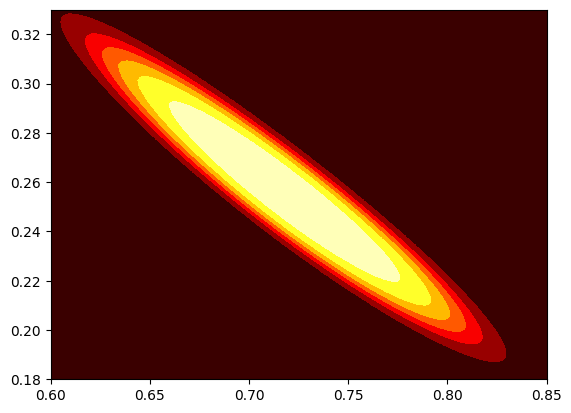

In [77]:
plt.tricontourf(x, y, c, cmap = 'hot_r')

plt.xlim(0.6, 0.85)
plt.ylim(0.18, 0.33)

plt.show()

In [65]:
import pandas as pd

df = pd.DataFrame({'x': x, 'y': y, 'c': c})